# Analysis of Temoa Utopia results using pyam

The file `temoa_utopia_pyam.xlsx` used in this notebook is created by running the "Utopia" model

    $ python temoa_model/ --config=temoa_model/config_sample

Running **Temoa** exports the results (among other formats) in an Excel format compatible
with the IAMC timeseries template
used by the IPCC WG3, the Energy Modeling Forum, and numerous EU Horizon 2020 projects
([read more](https://pyam-iamc.readthedocs.io/en/stable/data.html)).

The **pyam** package provides a suite of tools for analysis and visualization
of energy systems scenarios based on that format - [read the docs](https://pyam-iamc.readthedocs.io)!

In [25]:
import pyam
df = pyam.IamDataFrame("../self_construct/Temoa_2_test_run_feb_model/test_run_feb_pyam.xlsx")

pyam.core - INFO: Reading file ../self_construct/Temoa_2_test_run_feb_model/test_run_feb_pyam.xlsx
pyam.core - INFO: Reading meta indicators


## Visualization of CO2 emissions by species and sectors

The first plot shows the aggregate CO2 and NOx emissions over the model horizon.

pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: Temoa - scenario: test_run_feb - region: US'}, xlabel='Year', ylabel='?'>

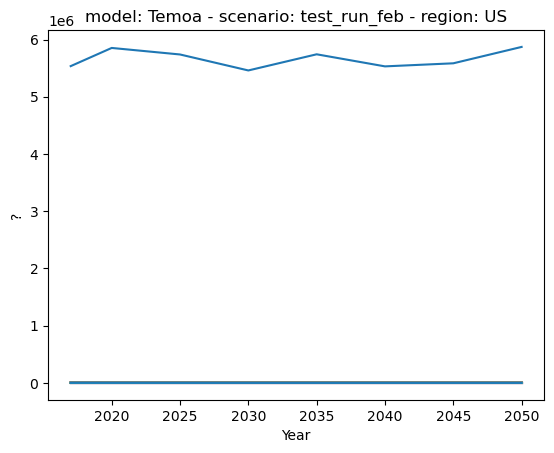

In [18]:
df.filter(variable='Emissions|*', level=0).plot()

The next plot shows the CO2 emissions by sector.

<AxesSubplot:title={'center':'model: Temoa scenario: test_run_feb region: US'}, xlabel='Year', ylabel='?'>

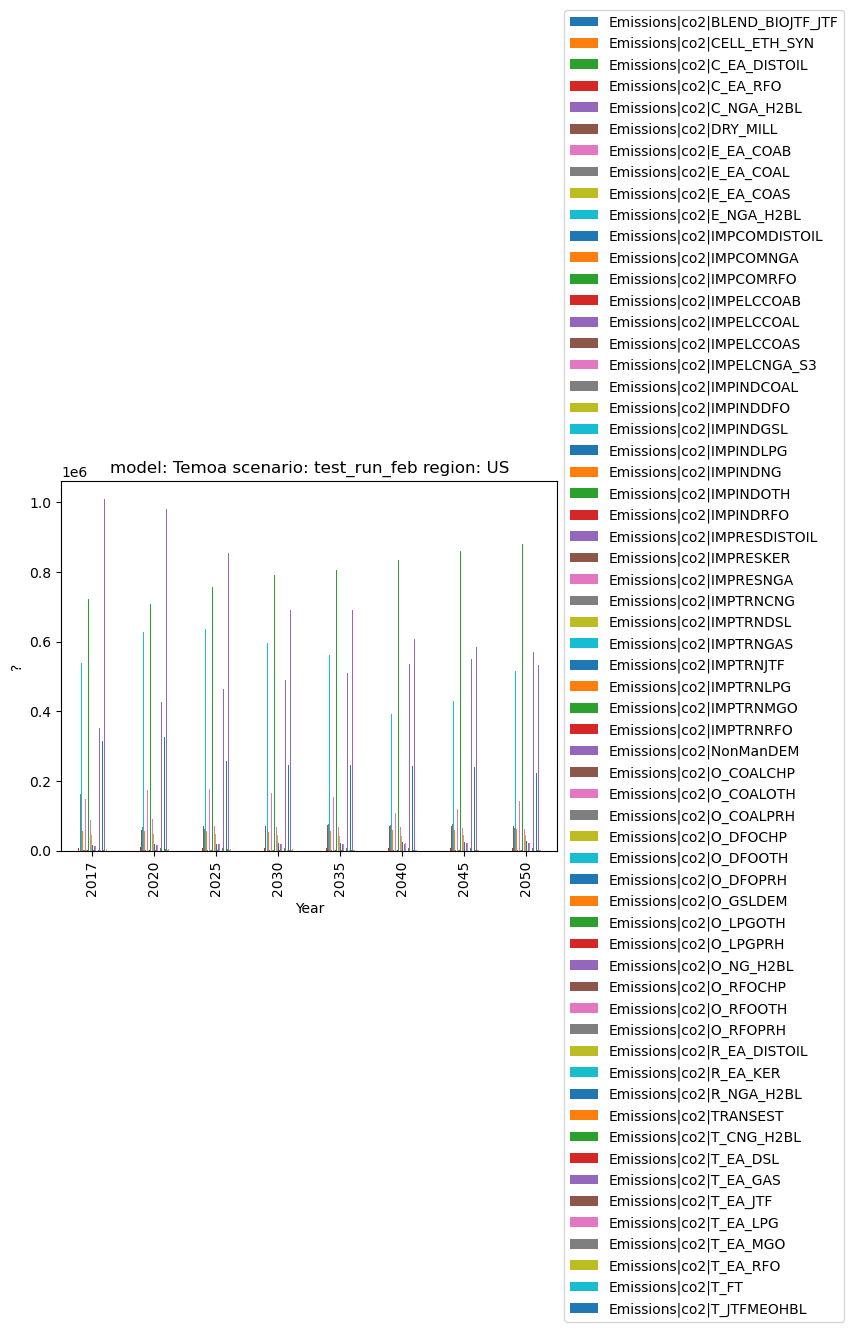

In [19]:
df.filter(variable='Emissions|co2|*').plot.bar()

Or if you prefer stacked bar charts...

<AxesSubplot:title={'center':'model: Temoa scenario: test_run_feb region: US'}, xlabel='Year', ylabel='?'>

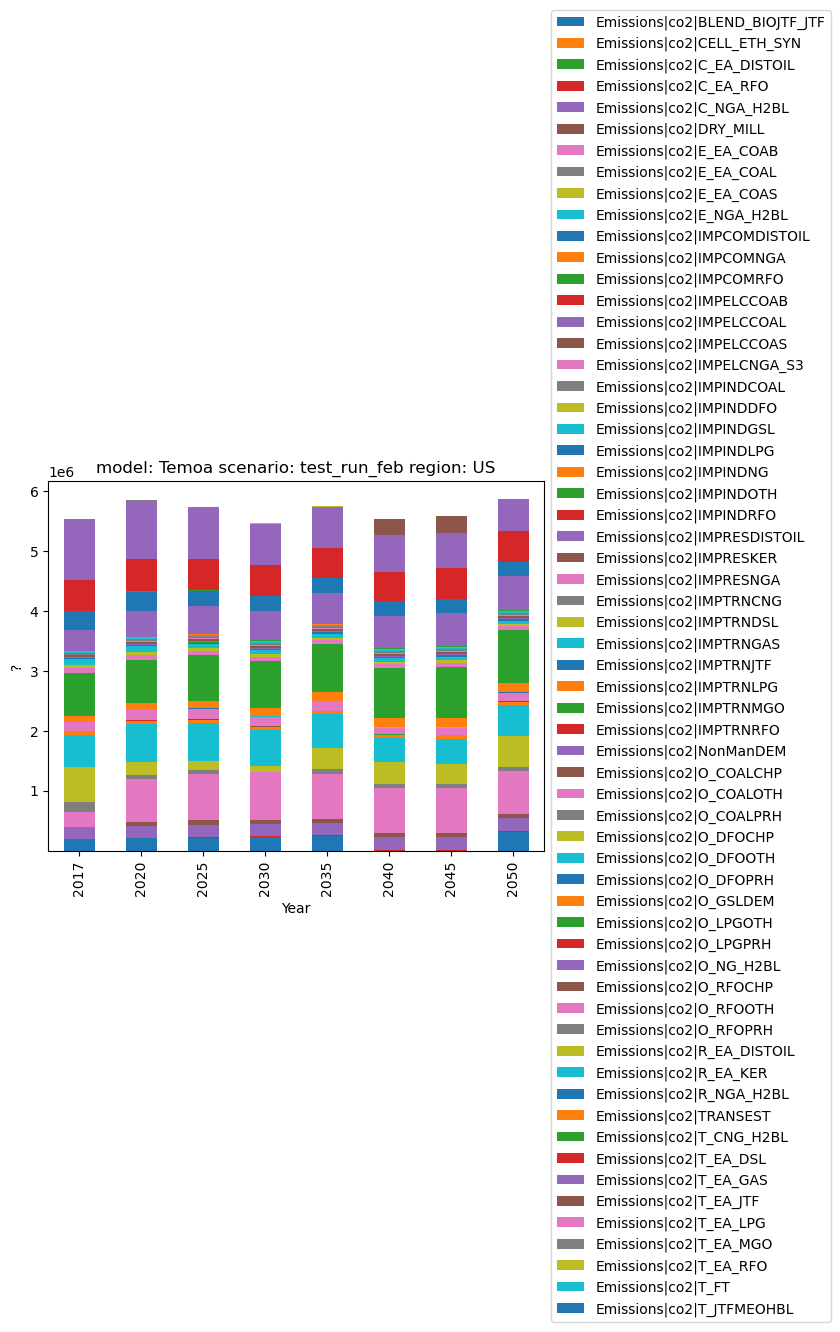

In [9]:
df.filter(variable='Emissions|co2|*').plot.bar(stacked=True)

## Further analysis of emissions

So you want to "look" at the actual values of some timeseries?

Here, we first select aggregate CO2 and the emissions by each technology starting with 'IMP'
(because the other technologies are zero anyway, as we have seen from the plots above).

In [10]:
co2 = df.filter(variable=['Emissions|co2', 'Emissions|co2|IMP*']).timeseries()
co2

2017  \
model scenario     region variable                    unit                 
Temoa test_run_feb US     Emissions|co2               ?     5.535019e+06   
                          Emissions|co2|IMPCOMDISTOIL ?     7.139155e+01   
                          Emissions|co2|IMPCOMNGA     ?     5.578326e+04   
                          Emissions|co2|IMPCOMRFO     ?     6.358150e+02   
                          Emissions|co2|IMPELCCOAB    ?     1.243193e+03   
                          Emissions|co2|IMPELCCOAL    ?     7.729454e+02   
                          Emissions|co2|IMPELCCOAS    ?     2.769495e+03   
                          Emissions|co2|IMPELCNGA_S3  ?     1.487291e+05   
                          Emissions|co2|IMPINDCOAL    ?     3.653734e+02   
                          Emissions|co2|IMPINDDFO     ?     5.562129e+02   
                          Emissions|co2|IMPINDGSL     ?     7.078170e+02   
                          Emissions|co2|IMPINDLPG     ?     1.710624e+03   
                          Emissions|co2|IMPINDNG      ?     9.705166e+04   
                          Emissions|co2|IMPINDOTH     ?     7.226589e+05   
                          Emissions|co2|IMPINDRFO     ?     1.825956e+02   
                          Emissions|co2|IMPRESDISTOIL ?              NaN   
                          Emissions|co2|IMPRESKER     ?              NaN   
                          Emissions|co2|IMPRESNGA     ?     8.666389e+04   
                          Emissions|co2|IMPTRNCNG     ?     8.212831e+02   
                          Emissions|co2|IMPTRNDSL     ?     4.478937e+04   
                          Emissions|co2|IMPTRNGAS     ?     9.297576e+04   
                          Emissions|co2|IMPTRNJTF     ?     1.693407e+04   
                          Emissions|co2|IMPTRNLPG     ?     1.153206e+01   
                          Emissions|co2|IMPTRNMGO     ?     1.357843e+03   
                          Emissions|co2|IMPTRNRFO     ?     5.973439e+02   

                                                                    2020  \
model scenario     region variable                    unit                 
Temoa test_run_feb US     Emissions|co2               ?     5.852737e+06   
                          Emissions|co2|IMPCOMDISTOIL ?              NaN   
                          Emissions|co2|IMPCOMNGA     ?     5.602041e+04   
                          Emissions|co2|IMPCOMRFO     ?     9.242186e+02   
                          Emissions|co2|IMPELCCOAB    ?     3.603448e+03   
                          Emissions|co2|IMPELCCOAL    ?     3.221859e+02   
                          Emissions|co2|IMPELCCOAS    ?     1.030288e+03   
                          Emissions|co2|IMPELCNGA_S3  ?     1.731690e+05   
                          Emissions|co2|IMPINDCOAL    ?     3.853751e+02   
                          Emissions|co2|IMPINDDFO     ?     1.175338e+03   
                          Emissions|co2|IMPINDGSL     ?     7.371870e+02   
                          Emissions|co2|IMPINDLPG     ?     2.424062e+03   
                          Emissions|co2|IMPINDNG      ?     1.178163e+05   
                          Emissions|co2|IMPINDOTH     ?     7.092031e+05   
                          Emissions|co2|IMPINDRFO     ?     3.734392e+01   
                          Emissions|co2|IMPRESDISTOIL ?              NaN   
                          Emissions|co2|IMPRESKER     ?              NaN   
                          Emissions|co2|IMPRESNGA     ?     8.964040e+04   
                          Emissions|co2|IMPTRNCNG     ?     1.464461e+03   
                          Emissions|co2|IMPTRNDSL     ?     4.677610e+04   
                          Emissions|co2|IMPTRNGAS     ?     9.035702e+04   
                          Emissions|co2|IMPTRNJTF     ?     1.815323e+04   
                          Emissions|co2|IMPTRNLPG     ?     1.049967e+02   
                          Emissions|co2|IMPTRNMGO     ?     1.316274e+03   
                          Emissions|co2

The next cell uses the [pyam.cumulative](https://pyam-iamc.readthedocs.io/en/stable/api/timeseries.html#pyam.cumulative) function
to compute the emissions on the timeseries data selected above.

In [11]:
co2.apply(pyam.cumulative, first_year=1990, last_year=2010, axis=1)

pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.timeseries - WARNING: Start of period 1990 outside of range.
pyam.times

model  scenario      region  variable                     unit
Temoa  test_run_feb  US      Emissions|co2                ?      NaN
                             Emissions|co2|IMPCOMDISTOIL  ?      NaN
                             Emissions|co2|IMPCOMNGA      ?      NaN
                             Emissions|co2|IMPCOMRFO      ?      NaN
                             Emissions|co2|IMPELCCOAB     ?      NaN
                             Emissions|co2|IMPELCCOAL     ?      NaN
                             Emissions|co2|IMPELCCOAS     ?      NaN
                             Emissions|co2|IMPELCNGA_S3   ?      NaN
                             Emissions|co2|IMPINDCOAL     ?      NaN
                             Emissions|co2|IMPINDDFO      ?      NaN
                             Emissions|co2|IMPINDGSL      ?      NaN
                             Emissions|co2|IMPINDLPG      ?      NaN
                             Emissions|co2|IMPINDNG       ?      NaN
                             Emissions|c

And just to prove the usefulness of this function:
it also works if you select a `first_year` argument that is not a native model year!

In [12]:
co2.apply(pyam.cumulative, first_year=1995, last_year=2010, axis=1)

pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.timeseries - WARNING: Start of period 1995 outside of range.
pyam.times

model  scenario      region  variable                     unit
Temoa  test_run_feb  US      Emissions|co2                ?      NaN
                             Emissions|co2|IMPCOMDISTOIL  ?      NaN
                             Emissions|co2|IMPCOMNGA      ?      NaN
                             Emissions|co2|IMPCOMRFO      ?      NaN
                             Emissions|co2|IMPELCCOAB     ?      NaN
                             Emissions|co2|IMPELCCOAL     ?      NaN
                             Emissions|co2|IMPELCCOAS     ?      NaN
                             Emissions|co2|IMPELCNGA_S3   ?      NaN
                             Emissions|co2|IMPINDCOAL     ?      NaN
                             Emissions|co2|IMPINDDFO      ?      NaN
                             Emissions|co2|IMPINDGSL      ?      NaN
                             Emissions|co2|IMPINDLPG      ?      NaN
                             Emissions|co2|IMPINDNG       ?      NaN
                             Emissions|c

## Exporting to different file formats

You can use pyam to export your data in different file formats,
for example as a [frictionless data package](https://frictionlessdata.io)!

In [13]:
df.to_datapackage('utopia.zip')

<div class="alert alert-info">

## Questions?

Take a look at [this tutorial](https://pyam-iamc.readthedocs.io/en/stable/tutorials/pyam_first_steps.html) for *first steps with pyam* - then join our [mailing list](https://groups.io/g/pyam)!

</div>